```Test mardown```

In [ ]:
import matplotlib.pyplot as plt

def plot_scatter_matrix(wine_data, good_threshold, bad_threshold, save_plot=False):
    
    
    
fig = plt.figure()  # an empty figure with no axes
fig.suptitle('No axes on this figure')  # Add a title so we know which it is

# fig, ax_lst = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes


In [13]:

plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')

plt.xlabel('x label')
plt.ylabel('y label')

plt.title("Simple Plot")

plt.legend()

plt.show()

NameError: name 'x' is not defined

In [13]:
import os

for root, dirs, files in os.walk("./"):
    for filename in files:
        print(filename)

sommelier1.ipynb
sommelier.ipynb
winequality-red.csv
sommelier-checkpoint.ipynb
sommelier1-checkpoint.ipynb


In [23]:
def putPlots(names, data, axes, **kwards):
    for i, label in enumerate(names):
        j = i
        while j > 0:
            for d in data:
                axes[j, i].plot(d[i], d[j], **kwards)
                axes[i, j].plot(d[j], d[i], **kwards)
            j -= 1

0
1
2
3
4
5
6
7
8
9
10


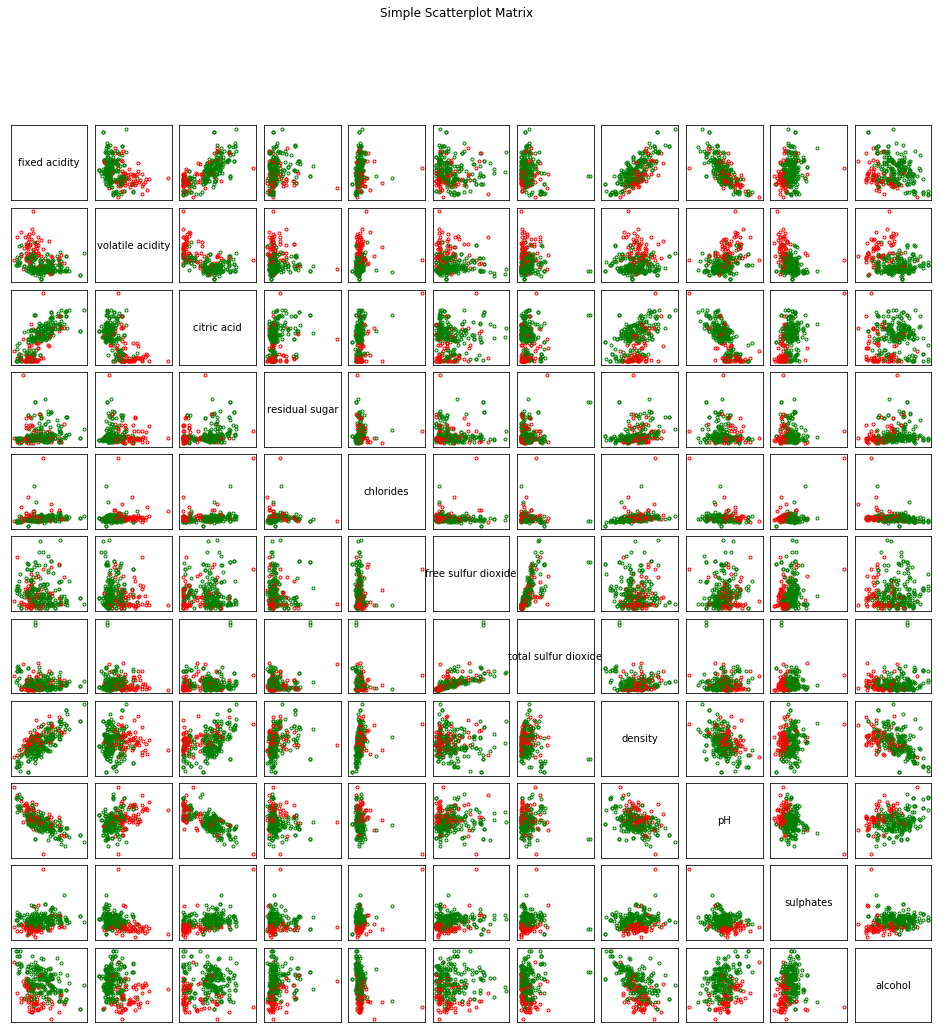

In [52]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import csv
import copy

def main():
#     np.random.seed(1977)
#     numvars, numdata = 4, 20
#     data = 10 * np.random.random((numvars, numdata))
    fig = 0
    rownum = 0
    data = []
    with open('winequality-red.csv') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=';')

        for row in csv_reader:
            data.append (row)
            rownum += 1
    
    fig = scatterplot_matrix(data, 6, 5)

    fig.suptitle('Simple Scatterplot Matrix')
    plt.show()

def scatterplot_matrix(data, good_threshold, bad_threshold):
    """Plots a scatterplot matrix of subplots.  Each row of "data" is plotted
    against other rows, resulting in a nrows by nrows grid of subplots with the
    diagonal subplots labeled with "names".  Additional keyword arguments are
    passed on to matplotlib's "plot" command. Returns the matplotlib figure
    object containg the subplot grid."""
    names = data[0]
    del names[-1]
#     dataiter = iter(data)
#     next(dataiter)
    numvars = len(names)
    fig, axes = plt.subplots(nrows=numvars, ncols=numvars, figsize=(numvars * 1.5,numvars * 1.5))
    fig.subplots_adjust(hspace=0.1, wspace=0.1)

    for ax in axes.flat:
        # Hide all ticks and labels
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)

        # Set up ticks only on one side for the "edge" subplots...
        if ax.is_first_col():
            ax.yaxis.set_ticks_position('left')
        if ax.is_last_col():
            ax.yaxis.set_ticks_position('right')
        if ax.is_first_row():
            ax.xaxis.set_ticks_position('top')
        if ax.is_last_row():
            ax.xaxis.set_ticks_position('bottom')
#     putPlots(names, data, linestyle='none', marker='o', color='black', mfc='none')

    for i, label in enumerate(names):
        j = copy.deepcopy(i)
        j -= 1
        print(i)
        while j >= 0:
            for d in data[1:]:
#                 print(d)
                color = '';
                if (float(d[-1]) > good_threshold):
                    color = 'green'
                elif (float(d[-1]) < bad_threshold):
                    color = 'red'
                else:
                    continue
                axes[j, i].plot(float(d[i]), float(d[j]), linestyle='none', marker='.', color=color, mfc='none')
                axes[i, j].plot(float(d[j]), float(d[i]), linestyle='none', marker='.', color=color, mfc='none')
            j -= 1
            
    # Plot the data.
#     for i, j in zip(*np.triu_indices_from(axes, k=1)):
#         for x, y in [(i,j), (j,i)]:
#             axes[x,y].plot(data[x], data[y], **kwargs)

    # Label the diagonal subplots...
    for i, label in enumerate(names):
        axes[i,i].annotate(label, (0.5, 0.5), xycoords='data',
                ha='center', va='center')

    # Turn on the proper x or y axes ticks.
#     for i, j in zip(range(numvars), itertools.cycle((-1, 0))):
#         axes[j,i].xaxis.set_visible(True)
#         axes[i,j].yaxis.set_visible(True)

    return fig

main()